In [1]:
from IPython.display import Latex

import numpy as np
from scipy.integrate import simps
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)

from scipy.optimize import curve_fit
from scipy.constants import hbar, m_p, e

# Theoretical background
Numerov's algorithm in matrix form is:

$$
H \, u = \left(-\frac{1}{2} B^{-1} A + V \right) u = E \, u
$$

where:

$$
A_{ij} = \frac{1}{\Delta r^2} \left( \delta_{i+1,j}  -2 \, \delta_{i,j} + \delta_{i-1,j} \right)
\,, \qquad
B_{ij} = \frac{1}{12} \left( \delta_{i+1,j} + 10 \, \delta_{i,j} + \delta_{i-1,j} \right)
\,, \qquad
V = \mathrm{diag}(V_0, V_1, \dots, V_{N-1})
$$

in order to find the eigenvalues and the eigenfunctions one only needs only to diagonalize the discrete hamiltonian $H$.

In [2]:
def V_ho(r,l):
    out = 0.5 * r**2 + l*(l+1)/(2 * r**2)
    return out

def V_hy(r, l):
    return - 1/r + l*(l+1)/(2 * r**2)

def mat_sandwich(n, diag_val):
    mat = diag_val * np.eye(n) 
    mat += np.eye(n,k=1)
    mat += np.eye(n,k=-1)
    return mat

def normalize_psi(psi, x):
    psi_sq = simps(abs(psi) ** 2, x)
    return psi / np.sqrt(psi_sq)

# 1. 1D harmonic oscillator via Numerov algorithm 

In [3]:
nptx = 1000
xgrid = np.linspace(-5-1e-3, 5, nptx) 
dx = 10/nptx

B = mat_sandwich(nptx,10) / 12
Binv = np.linalg.inv(B)
A = mat_sandwich(nptx, -2) / (dx**2)
KE = - Binv @ A / 2

[0.50055055 1.50165165 2.50275283 3.503855   4.50496684] [0.5 1.5 2.5 3.5 4.5]


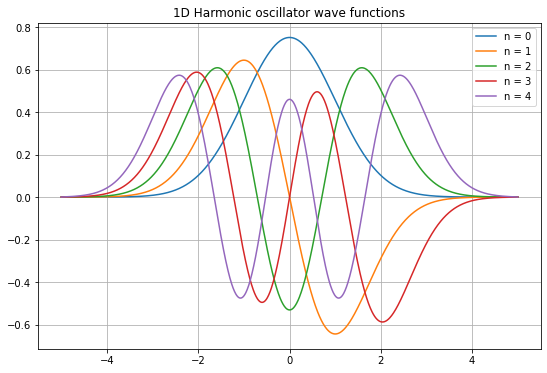

In [4]:
l=0

H_ho = KE + np.diag(V_ho(xgrid, l))
E_ho , wf_ho = np.linalg.eigh(H_ho) # solve eigensystem
wf_ho = normalize_psi(wf_ho, xgrid)

n = np.arange(0, 5)
E_ho_th = (n + 1/2)

print(E_ho[0:5], E_ho_th)

for i in range(5):
    plt.plot(xgrid, np.sign(wf_ho[0, i])*wf_ho[:, i], label=f'n = {i}')
    plt.grid(True)
    plt.legend()
    plt.title("1D Harmonic oscillator wave functions")

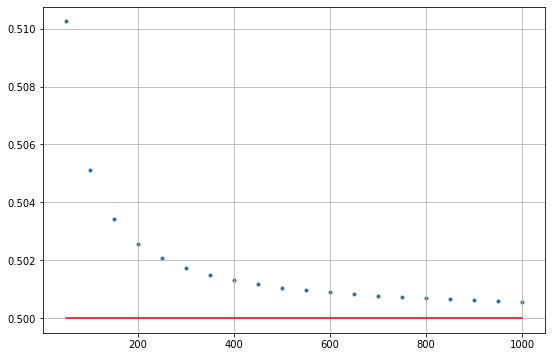

In [5]:
l=0

nptxx =  np.linspace(50, 1000, 20) # [50, 100, 200, 400, 500]
E_g = np.zeros(np.size(nptxx))

for i in range(np.size(nptxx)):
    nptx = np.int(nptxx[i])
    xgrid = np.linspace(-5-1e-3, 5, nptx) 
    dx = 10/nptx

    B = mat_sandwich(nptx, 10) / 12
    Binv = np.linalg.inv(B)
    A = mat_sandwich(nptx, -2) / (dx**2)
    KE = - Binv @ A / 2

    H_ho = KE + np.diag(V_ho(xgrid, l))
    E_ho , wf_ho = np.linalg.eigh(H_ho) # solve eigensystem
    
    E_g[i] = np.min(E_ho)
    
plt.scatter(nptxx, E_g, marker='.')
plt.plot(nptxx, 0.5*np.ones(np.size(nptxx)), color='r')
plt.grid(True)

# 2. 3D harmonic oscillator via Numerov

In [6]:
dr = 0.05
npt = 1005
rgrid = np.arange(1, npt+1) * dr
B = mat_sandwich(npt, 10) / 12
Binv = np.linalg.inv(B)
A = mat_sandwich(npt,-2) / (dr**2)
KE = - Binv @ A / 2

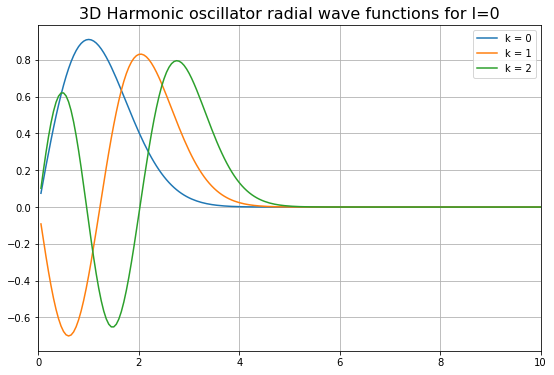

[1.49999983 3.49999846 5.49999435] [1.5 3.5 5.5]


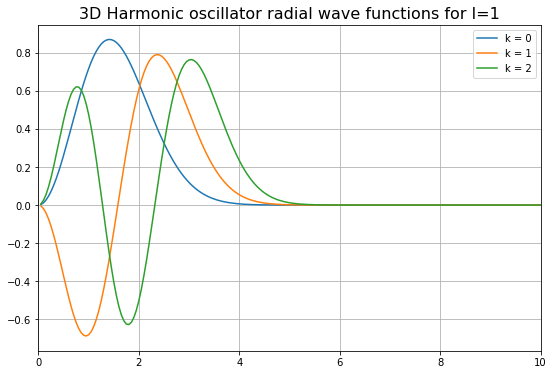

[2.49998594 4.49996364 6.49993336] [2.5 4.5 6.5]


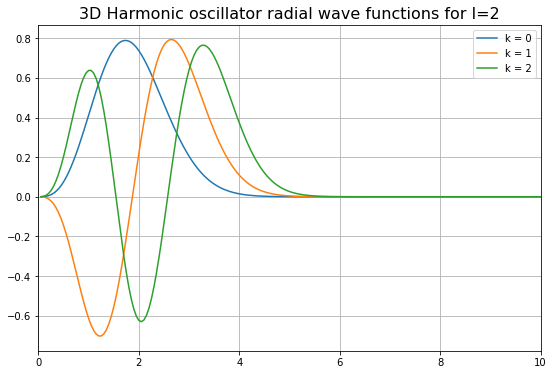

[3.49999969 5.49999817 7.49999401] [3.5 5.5 7.5]


In [7]:
for l in range(3):
    H_3d = KE + np.diag(V_ho(rgrid, l))
    E_3d , wf_3d = np.linalg.eigh(H_3d) # solve eigensystem
    wf_3d = normalize_psi(wf_3d, rgrid)
    
    for i in range(3):
        plt.plot(rgrid, wf_3d[:,i], label=f'k = {i}')
    plt.title(f"3D Harmonic oscillator radial wave functions for l={l}", fontsize=16)
    plt.xlim(0,10)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    k = np.arange(0, 3)
    E_3d_th = (2*k + l + 3/2)

    print(E_3d[:3], E_3d_th)

# 3. Bessel functions using the recursion formulae

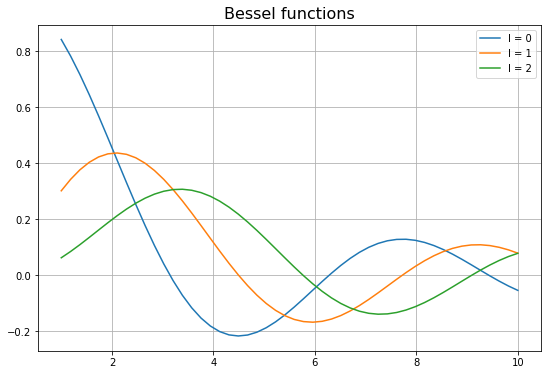

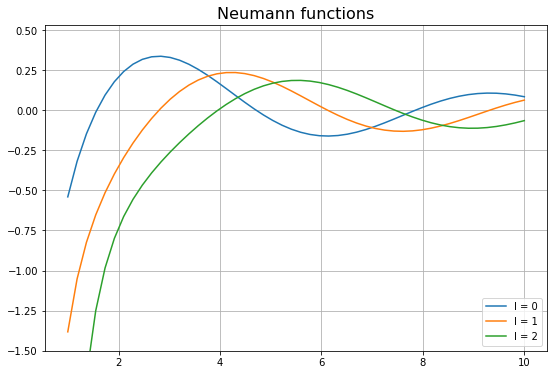

In [8]:
def bessel(l, x):
    if l == 0:
        return np.sin(x) / x
    if l == 1:
        return np.sin(x)/(x**2) - np.cos(x)/x
    return (2*l - 1)/x * bessel(l-1, x) - bessel(l-2, x)

def neumann(l, x):
    if l == 0:
        return - np.cos(x)/x
    if l == 1:
        return - np.cos(x)/(x**2) - np.sin(x)/x
    return (2*l - 1)/x * neumann(l-1, x) - neumann(l-2, x)

figB, axB = plt.subplots()
figN, axN = plt.subplots()

x = np.linspace(1, 10)

for l in range(3):
    axB.plot(x, bessel(l, x), label=f'l = {l}')
    axN.plot(x, neumann(l, x), label=f'l = {l}')
    
axB.set_title('Bessel functions', fontsize=16)
axN.set_title('Neumann functions', fontsize=16)

axN.set_ylim(-1.5)

axB.grid()
axN.grid()

axB.legend()
axN.legend(loc='lower right')

plt.show()